In [73]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [74]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [75]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [76]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,17102.99,17108.06,17100.00,17106.70,44.25014,0.0216921134842453,1669862579999,1013.0,22.31161,1.669863e+09
1,2,BTCBUSD,17106.70,17112.16,17104.99,17109.55,74.59636,0.0166601390098531,1669862639999,1389.0,37.82336,1.669863e+09
2,3,BTCBUSD,17109.59,17118.00,17109.59,17115.13,88.02512,0.0323795017881835,1669862699999,2050.0,43.70296,1.669863e+09
3,4,BTCBUSD,17115.14,17119.00,17109.74,17116.62,105.36376,0.00864731459981959,1669862759999,2066.0,52.67963,1.669863e+09
4,5,BTCBUSD,17117.12,17120.70,17112.36,17119.33,93.33828,0.0129110504571024,1669862819999,1870.0,50.12119,1.669863e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
147,148,BTCBUSD,17131.32,17136.88,17129.35,17133.75,47.63315,0.014184546199594,1669871099999,1071.0,26.20605,1.669871e+09
148,149,BTCBUSD,17134.18,17138.81,17133.93,17138.00,53.51380,0.022294618125873,1669871159999,1177.0,32.98956,1.669871e+09
149,150,BTCBUSD,17137.72,17140.12,17135.05,17135.29,36.14951,-0.0141792490482998,1669871219999,1001.0,21.83945,1.669871e+09
150,151,BTCBUSD,17135.52,17141.41,17131.30,17139.97,108.78366,0.0259694482571917,1669871279999,1792.0,48.15386,1.669871e+09


In [77]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,17102.99,17108.06,17100.00,17106.70,44.25014,0.0216921134842453,1669862579999,1013.0,22.31161,1.669863e+09
1,2,BTCBUSD,17106.70,17112.16,17104.99,17109.55,74.59636,0.0166601390098531,1669862639999,1389.0,37.82336,1.669863e+09
2,3,BTCBUSD,17109.59,17118.00,17109.59,17115.13,88.02512,0.0323795017881835,1669862699999,2050.0,43.70296,1.669863e+09
3,4,BTCBUSD,17115.14,17119.00,17109.74,17116.62,105.36376,0.00864731459981959,1669862759999,2066.0,52.67963,1.669863e+09
4,5,BTCBUSD,17117.12,17120.70,17112.36,17119.33,93.33828,0.0129110504571024,1669862819999,1870.0,50.12119,1.669863e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
147,148,BTCBUSD,17131.32,17136.88,17129.35,17133.75,47.63315,0.014184546199594,1669871099999,1071.0,26.20605,1.669871e+09
148,149,BTCBUSD,17134.18,17138.81,17133.93,17138.00,53.51380,0.022294618125873,1669871159999,1177.0,32.98956,1.669871e+09
149,150,BTCBUSD,17137.72,17140.12,17135.05,17135.29,36.14951,-0.0141792490482998,1669871219999,1001.0,21.83945,1.669871e+09
150,151,BTCBUSD,17135.52,17141.41,17131.30,17139.97,108.78366,0.0259694482571917,1669871279999,1792.0,48.15386,1.669871e+09


In [78]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
# df_candle

In [79]:
# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

In [80]:
# mpf.plot(
#     df_candle.tail(5),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [81]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-12-01 02:42:59.999,1,BTCBUSD,17102.99,17108.06,17100.00,17106.70,44.25014,0.0216921134842453,1013.0,22.31161,1.669863e+09
2022-12-01 02:43:59.999,2,BTCBUSD,17106.70,17112.16,17104.99,17109.55,74.59636,0.0166601390098531,1389.0,37.82336,1.669863e+09
2022-12-01 02:44:59.999,3,BTCBUSD,17109.59,17118.00,17109.59,17115.13,88.02512,0.0323795017881835,2050.0,43.70296,1.669863e+09
2022-12-01 02:45:59.999,4,BTCBUSD,17115.14,17119.00,17109.74,17116.62,105.36376,0.00864731459981959,2066.0,52.67963,1.669863e+09
2022-12-01 02:46:59.999,5,BTCBUSD,17117.12,17120.70,17112.36,17119.33,93.33828,0.0129110504571024,1870.0,50.12119,1.669863e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01 05:04:59.999,148,BTCBUSD,17131.32,17136.88,17129.35,17133.75,47.63315,0.014184546199594,1071.0,26.20605,1.669871e+09
2022-12-01 05:05:59.999,149,BTCBUSD,17134.18,17138.81,17133.93,17138.00,53.51380,0.022294618125873,1177.0,32.98956,1.669871e+09
2022-12-01 05:06:59.999,150,BTCBUSD,17137.72,17140.12,17135.05,17135.29,36.14951,-0.0141792490482998,1001.0,21.83945,1.669871e+09


In [82]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

In [83]:
# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

In [84]:
# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [85]:
# dir(talib)

In [90]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
df = df.head(100)
df = df.reset_index(drop=True) 
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,17102.99,17108.06,17100.00,17106.70,44.25014,0.0216921134842453,1013.0,22.31161,1.669863e+09
1,2,BTCBUSD,17106.70,17112.16,17104.99,17109.55,74.59636,0.0166601390098531,1389.0,37.82336,1.669863e+09
2,3,BTCBUSD,17109.59,17118.00,17109.59,17115.13,88.02512,0.0323795017881835,2050.0,43.70296,1.669863e+09
3,4,BTCBUSD,17115.14,17119.00,17109.74,17116.62,105.36376,0.00864731459981959,2066.0,52.67963,1.669863e+09
4,5,BTCBUSD,17117.12,17120.70,17112.36,17119.33,93.33828,0.0129110504571024,1870.0,50.12119,1.669863e+09
...,...,...,...,...,...,...,...,...,...,...,...
95,96,BTCBUSD,17163.42,17164.73,17158.68,17164.09,35.33079,0.00390365090408492,813.0,21.33119,1.669868e+09
96,97,BTCBUSD,17163.81,17165.99,17160.39,17162.99,47.47174,-0.00477749404123973,867.0,20.77645,1.669868e+09
97,98,BTCBUSD,17162.89,17164.26,17158.11,17161.82,56.20476,-0.00623438127261615,990.0,29.70719,1.669868e+09
98,99,BTCBUSD,17161.21,17165.50,17155.16,17156.79,81.30611,-0.0257557596463085,1416.0,39.16411,1.669868e+09


In [91]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int32, 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0

In [93]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
print(patterns)

    CDL2CROWS  CDL3BLACKCROWS  CDL3INSIDE  CDL3LINESTRIKE  CDL3OUTSIDE  \
0           0               0           0               0            0   
1           0               0           0               0            0   
2           0               0           0               0            0   
3           0               0           0               0            0   
4           0               0           0               0            0   
..        ...             ...         ...             ...          ...   
95          0               0           0               0            0   
96          0               0           0               0            0   
97          0               0           0               0            0   
98          0               0           0               0            0   
99          0               0           0               0            0   

    CDL3STARSINSOUTH  CDL3WHITESOLDIERS  CDLABANDONEDBABY  CDLADVANCEBLOCK  \
0                  0             

0       0
1       0
2       0
3       0
4       0
     ... 
95    300
96    100
97   -100
98      0
99    100
Length: 100, dtype: int64


<AxesSubplot: >

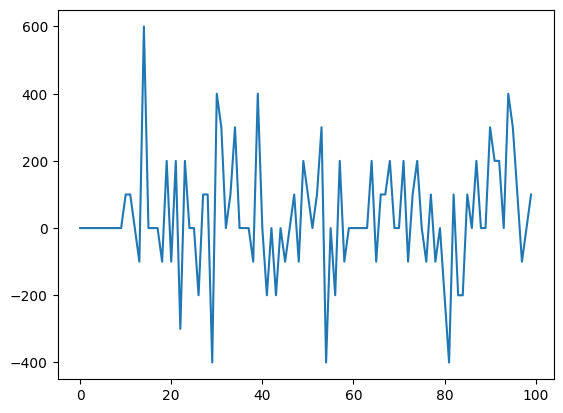

In [94]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()


In [95]:
df1=pd.DataFrame(all_pats)
df3=df.iloc[:,7]
print(df3)

#print(df1)
#print(df3)
#frames = [df1, df3]



df4=df.iloc[:,2:10]

print(df4)




print(df1)
array = df1.values
array2 = [];

for x in range(0,len(array)):
    for y in array[x]: 
        if  y>=200:
            array2.append(1)
       
        elif y<=-200 :
            array2.append(1)
        else:
            array2.append(0)
df2=pd.DataFrame(array2).astype("int")
print(df2)



0       0.0216921134842453
1       0.0166601390098531
2       0.0323795017881835
3      0.00864731459981959
4       0.0129110504571024
              ...         
95     0.00390365090408492
96    -0.00477749404123973
97    -0.00623438127261615
98     -0.0257557596463085
99     0.00868496259929623
Name: Change, Length: 100, dtype: object
        Open      High       Low     Close  VolumeBTC                Change  \
0   17102.99  17108.06  17100.00  17106.70   44.25014    0.0216921134842453   
1   17106.70  17112.16  17104.99  17109.55   74.59636    0.0166601390098531   
2   17109.59  17118.00  17109.59  17115.13   88.02512    0.0323795017881835   
3   17115.14  17119.00  17109.74  17116.62  105.36376   0.00864731459981959   
4   17117.12  17120.70  17112.36  17119.33   93.33828    0.0129110504571024   
..       ...       ...       ...       ...        ...                   ...   
95  17163.42  17164.73  17158.68  17164.09   35.33079   0.00390365090408492   
96  17163.81  17165.99  17160.

In [123]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""


X=df4
print(X)
y=df2


        Open      High       Low     Close  VolumeBTC                 Change  Trades  BuyQuoteVolume
0   17102.99  17108.06  17100.00  17106.70   44.25014     0.0216921134842453  1013.0        22.31161
1   17106.70  17112.16  17104.99  17109.55   74.59636     0.0166601390098531  1389.0        37.82336
2   17109.59  17118.00  17109.59  17115.13   88.02512     0.0323795017881835  2050.0        43.70296
3   17115.14  17119.00  17109.74  17116.62  105.36376    0.00864731459981959  2066.0        52.67963
4   17117.12  17120.70  17112.36  17119.33   93.33828     0.0129110504571024  1870.0        50.12119
5   17118.92  17131.09  17118.70  17129.43  134.50387     0.0613940599056602  2567.0        77.10834
6   17129.00  17134.73  17126.08  17133.11  102.73815     0.0239943954696747  2499.0        46.66970
7   17133.06  17139.00  17122.07  17124.11  106.21617    -0.0522381874574695  2219.0        43.20637
8   17124.11  17128.07  17121.66  17122.59   52.83864   -0.00887637372103097  1279.0       

In [97]:
"""
y value for DecisionTreeClassifier

"""




'\ny value for DecisionTreeClassifier\n\n'

In [98]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [99]:
model.fit(X, y)

DecisionTreeClassifier()

In [129]:
## Directally Grab Fidable data from internet but it have to be superviged test data from database
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 100)
df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
df = df.iloc[0]
print(df)

Open         16971.100000
High         16979.520000
Low          16968.730000
Close        16974.520000
VolumeBTC       65.829770
Trades        1266.000000
Change           0.020152
Name: 2022-12-02 00:22:00, dtype: float64


In [130]:
print(model.predict([df]))

C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but DecisionTreeClassifier is expecting 8 features as input.

In [108]:
# model.predict([  [40, 0],[60, 1] ])
print(model.predict([ [300,4621,4464,4571,444,4687212,4455,4445] ]))

[0]


C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
